In [17]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 46.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 54.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 23.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
from umap import UMAP
umap_model = UMAP(n_neighbors=10, n_components=8, min_dist=0.0, metric='cosine', random_state=42)
umap_model

UMAP(metric='cosine', min_dist=0.0, n_components=8, n_neighbors=10, random_state=42)

In [8]:
from hdbscan import HDBSCAN
hdbscan_model = HDBSCAN(min_cluster_size=50, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
hdbscan_model

HDBSCAN(min_cluster_size=50, prediction_data=True)

In [3]:
from safetensors.torch import load_file

In [4]:
embeddings = load_file("/workspace/embeddings.safetensors")

In [6]:
embeddings = embeddings["embeddings"]

In [7]:
embeddings

tensor([[-0.3585, -0.2605,  0.0638,  ...,  0.2500, -0.0972,  0.2093],
        [ 0.3710, -0.2400,  0.5794,  ...,  0.1147, -0.3229, -0.3595],
        [-0.1424,  0.1967, -0.4405,  ..., -0.0211, -0.3500,  0.0502],
        ...,
        [-0.0600,  1.3236,  0.0438,  ..., -0.5655,  0.0663, -0.0193],
        [-0.1206, -0.4493, -0.0328,  ..., -0.0252, -0.9784, -0.9554],
        [ 0.1051,  0.0271,  0.3072,  ...,  0.5899, -0.9996,  0.0636]])

In [12]:
ump = UMAP()
ump

UMAP()

In [15]:
u = ump.transform(embeddings)
u

array([[ 3.0186632 , 12.576851  ],
       [-2.729923  , 15.04163   ],
       [-0.14582716, 16.678177  ],
       ...,
       [-0.63058805,  7.739765  ],
       [-4.5838585 ,  8.7897835 ],
       [ 1.7817128 , 12.831228  ]], dtype=float32)

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


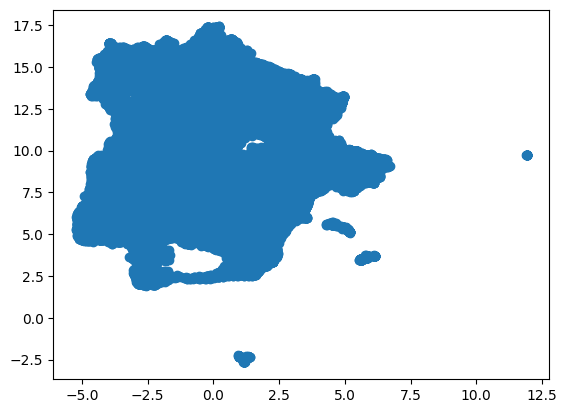

In [19]:
plt.scatter(u[:,0], u[:,1])

In [35]:
import umap.plot

/opt/conda/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.10/site-packages/umap/plot.py:20: UserWarning: The umap.plot package requires extra plotting libraries to be installed.
    You can install these via pip using

    pip install umap-learn[plot]

    or via conda using

     conda install pandas matplotlib datashader bokeh holoviews colorcet scikit-image
    
  warn(


ImportError: umap.plot requires pandas matplotlib datashader bokeh holoviews scikit-image and colorcet to be installed

In [31]:
pip install umap-learn[plot]

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install pandas matplotlib datashader bokeh holoviews colorcet scikit-image

Note: you may need to restart the kernel to use updated packages.
